In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
# sudo apt-get update -y
# sudo apt-get install -y dvipng

In [8]:
def cascade(generateur, nb_iterations):
    fractal = generateur
    for i in range(nb_iterations):
        fractal = np.kron(fractal, generateur)
    return(fractal)

In [9]:
im = np.array([['p1', 'p_2'],['p_3', 'p_4']])
im1 = np.zeros((2,2))

In [10]:
im2 = np.zeros((4,4))

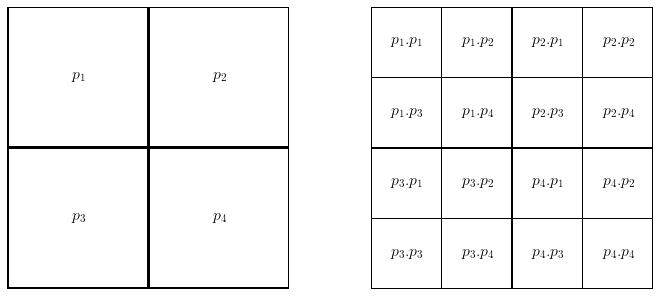

In [11]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 4))

axs[0].pcolormesh(im1, edgecolors='k', linewidth=2, cmap='gist_yarg')
axs[0].set_aspect(1)
axs[0].set_axis_off()
axs[0].text(0.5, 1.5, r'$p_1$', ha="center", va="center", color="black", fontsize=16)
axs[0].text(1.5, 1.5, r'$p_2$', ha="center", va="center", color="black", fontsize=16)
axs[0].text(0.5, 0.5, r'$p_3$', ha="center", va="center", color="black", fontsize=16)
axs[0].text(1.5, 0.5, r'$p_4$', ha="center", va="center", color="black", fontsize=16)

axs[1].pcolormesh(im2, edgecolors='k', linewidth=0.5, cmap='gist_yarg')
axs[1].pcolormesh([0,4], [0,4],im1, edgecolors='k', linewidth=40, cmap='gist_yarg', alpha=0 )
axs[1].grid(linestyle='--')
axs[1].set_aspect(1)
axs[1].set_axis_off()

lab = [r'$p_3.p_3$', r'$p_3.p_4$', r'$p_4.p_3$', r'$p_4.p_4$',
      r'$p_3.p_1$', r'$p_3.p_2$', r'$p_4.p_1$', r'$p_4.p_2$',
      r'$p_1.p_3$', r'$p_1.p_4$', r'$p_2.p_3$', r'$p_2.p_4$',
      r'$p_1.p_1$', r'$p_1.p_2$', r'$p_2.p_1$', r'$p_2.p_2$']
t = 0
for i,vi in enumerate(np.arange(0.5, 4.5)):
    for j,vj in enumerate(np.arange(0.5, 4.5)):
        axs[1].text(vj, vi, lab[t], ha="center", va="center", color="black", fontsize=16)
        t = t+1

In [12]:
gen1 = np.array([[1/5,0,1/5],[0,1/5,0],[1/5,0,1/5]])
gen2 = np.array([[3/20,0,3/20],[0,2/5,0],[3/20,0,3/20]])
gen3 = np.array([[1/8,0,1/8],[0,1/2,0],[1/8,0,1/8]])

In [13]:
X0, Y0 = np.where(gen1)

In [109]:
cas12 = cascade([[1/5,0,1/5],[0,1/5,0],[1/5,0,1/5]],2)
cas22 = cascade([[3/20,0,3/20],[0,2/5,0],[3/20,0,3/20]],2)
cas32 = cascade([[1/8,0,1/8],[0,1/2,0],[1/8,0,1/8]],2)
x2 = np.arange(0, cas12.shape[0], 1)
y2 = np.arange(0, cas12.shape[0], 1)
X2, Y2 = np.meshgrid(x2, y2, sparse=False)

In [110]:
cas11 = cascade([[1/5,0,1/5],[0,1/5,0],[1/5,0,1/5]],1)
cas21 = cascade([[3/20,0,3/20],[0,2/5,0],[3/20,0,3/20]],1)
cas31 = cascade([[1/8,0,1/8],[0,1/2,0],[1/16,0,1/8]],1)
x1 = np.arange(0, cas11.shape[0], 1)
y1 = np.arange(0, cas11.shape[0], 1)
X1, Y1 = np.meshgrid(x1, y1, sparse=False)

In [111]:
matplotlib.rcParams["figure.figsize"] =[20,20]

In [112]:
limz1 = np.max(cas31)
limz2 = np.max(cas32)

In [ ]:
cass = [cas12, cas22, cas32]
for i, cas in enumerate(cass):
    fig = plt.figure()
    fig.subplots_adjust(wspace=-0.7, hspace=-0.7)
    fig.subplots_adjust(left=0, right=0.5, bottom=0, top=0.5)
    ax1 = fig.add_subplot(111, projection='3d')
    #ax1.bar3d(X2.ravel(), Y2.ravel(), np.zeros(X2.size), 1, 1, cas.ravel(), '0.95' )
    ax1.bar3d(X2.ravel(), Y2.ravel(), np.zeros(X2.size), 1, 1, cas.ravel(), '0.9')
    ax1.set_axis_off()
    ax1.set_zlim((0,limz2))
    ax1.azim = -60
    ax1.dist = 9
    ax1.elev = 30
    plt.savefig('cas2' + str(i)+ '.png')
    plt.savefig('cas2' + str(i)+ '.eps', format='eps')

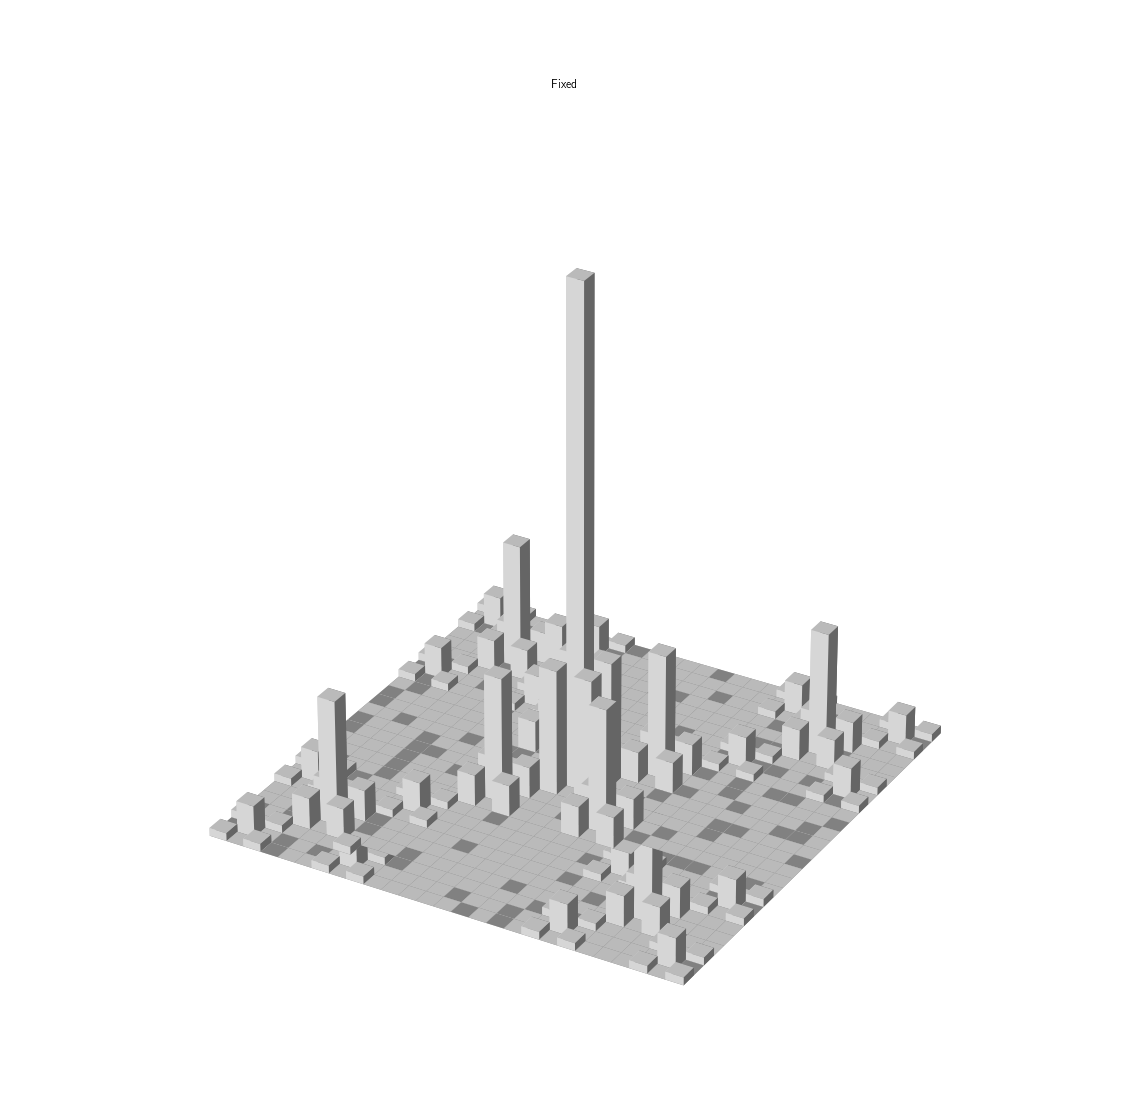

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal


def sph2cart(r, theta, phi):
    '''spherical to cartesian transformation.'''
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

def sphview(ax):
    '''returns the camera position for 3D axes in spherical coordinates'''
    r = np.square(np.max([ax.get_xlim(), ax.get_ylim()], 1)).sum()
    theta, phi = np.radians((90-ax.elev, ax.azim))
    return r, theta, phi

def ravzip(*itr):
    '''flatten and zip arrays'''
    return zip(*map(np.ravel, itr))

#Generate data
res = 27
sl = slice(-3, 3, complex(res))
Y, X = np.mgrid[sl, sl]
grid = np.array([X, Y])
(dx,), (dy,) = 0.8*np.diff(X[0,:2]), 0.8*np.diff(Y[:2,0])

#2D Gaussian
mu = (0, 0)
covm = np.array([[ 0.8,  0.3],
                 [ 0.3,  0.5]])
rv = multivariate_normal(mu, covm)
Zg = rv.pdf(grid.transpose(1,2,0)).T

#generate the figure
fig, ( ax2) = plt.subplots(1,1, subplot_kw=dict(projection='3d'))


#Fixed bar3d
ax2.set_title('Fixed')
ax2.set_axis_off()
xyz = np.array(sph2cart(*sphview(ax2)), ndmin=3).T       #camera position in xyz
zo = np.multiply([X, Y, np.zeros_like(Zg)], xyz).sum(0)  #"distance" of bars from camera

bars = np.empty(cas32.shape, dtype=object)
for i, (x,y,dz,o) in enumerate(ravzip(X2.ravel(), Y2.ravel(), cas32.ravel(), zo)):
    j, k = divmod(i, res)
    bars[j, k] = pl = ax2.bar3d(x, y, 0, 1, 1, dz, '0.95')
    pl._sort_zpos = o

plt.show()

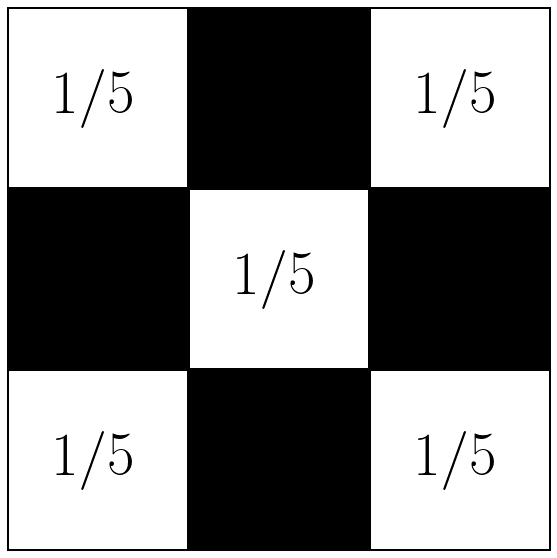

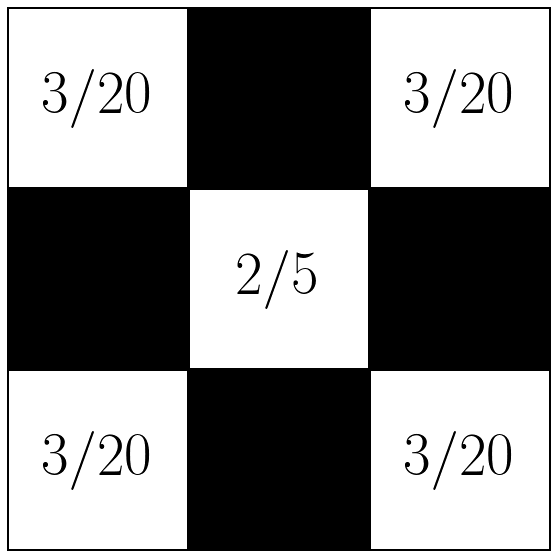

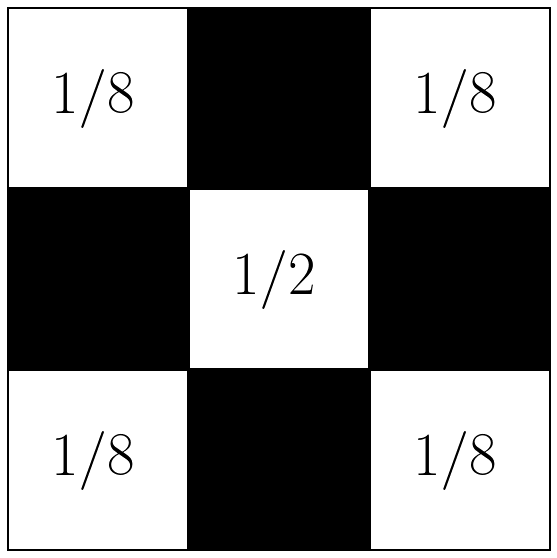

In [69]:
l1 = [r'$1 / 5$', r'$1 / 5$', r'$1 / 5$', r'$1 / 5$' , r'$1 / 5$']
l2 = [r'$3 / 20$', r'$3 / 20$', r'$2 / 5$', r'$3 / 20$' , r'$3 / 20$']
l3 = [r'$1 / 8$', r'$1 / 8$', r'$1 / 2$', r'$1 / 8$' , r'$1 / 8$']
l = [l1, l2, l3]

for cas, ll in enumerate(l):
    fig = plt.figure(figsize=(10,10))

    ax1 = fig.add_subplot(111)
    ax1.pcolormesh(gen1==0, edgecolors='k', linewidth=2, cmap='gist_yarg')
    ax1.set_aspect(1)
    ax1.set_axis_off()

    for s,(i,j) in enumerate(zip(X0,Y0)):
        ax1.text(i+0.5, j+0.5, ll[s], ha="center", va="center", color="black", fontsize=60)
    
    plt.savefig('generateur'+ str(cas+1)+ '.png')
    plt.savefig('generateur'+ str(cas+1)+ '.eps', format='eps')

Dimensions généralisees

In [22]:
q = np.arange(-50,50.001,0.03)

In [23]:
def entropy(P,q):
    if q ==1:
        return(-np.sum(P * np.log(P))/np.log(3))
    else :
        return(1/(1-q) * np.log(np.sum(P**q))/ np.log(3))

In [24]:
Dimension = pd.DataFrame({'q': q})

In [25]:
Dimension['Dcas_1'] = Dimension.q.apply(lambda x : entropy(gen1[gen1>0],x))
Dimension['Dcas_2'] = Dimension.q.apply(lambda x : entropy(gen2[gen2>0],x))
Dimension['Dcas_3'] = Dimension.q.apply(lambda x : entropy(gen3[gen3>0],x))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


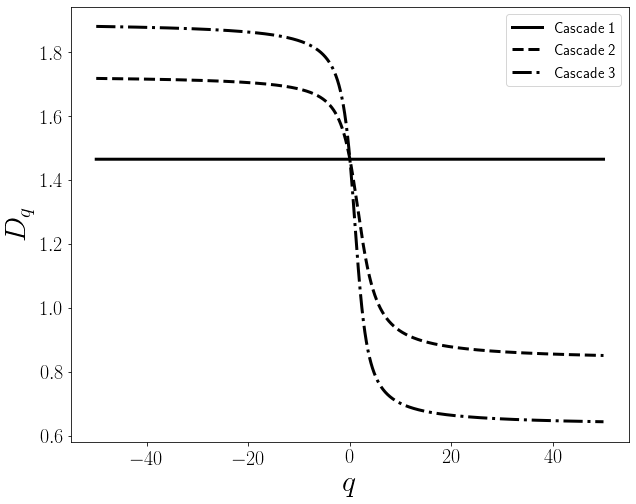

In [48]:
ax = Dimension.plot.line('q', 'Dcas_1', color='black', label='Cascade 1',  linewidth=3, figsize=(10,8))
Dimension.plot.line('q', 'Dcas_2', color='black', label='Cascade 2', ax=ax, linewidth=3, linestyle='--')
Dimension.plot.line('q', 'Dcas_3', color='black', label='Cascade 3', ax=ax, linewidth=3, linestyle='-.')
ax.set_ylabel('$D_q$', fontsize=30)
ax.set_xlabel('$q$', fontsize=30)
ax.legend(fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=18)
handles, labels = ax.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, fontsize=15)
plt.savefig('dimension.png')
plt.savefig('dimension.eps', format='eps')

In [31]:
def alpha(P,q):
    Pq = P**q / np.sum(P**q) 
    return(- np.sum(Pq * np.log(P)) / np.log(3))
def falpha(P,q):
    Pq = P**q / np.sum(P**q) 
    return(- np.sum(Pq * np.log(Pq)) / np.log(3))

In [32]:
Dimension['alpha_1'] = Dimension.q.apply(lambda x : alpha(gen1[gen1>0],x))
Dimension['alpha_2'] = Dimension.q.apply(lambda x : alpha(gen2[gen2>0],x))
Dimension['alpha_3'] = Dimension.q.apply(lambda x : alpha(gen3[gen3>0],x))
Dimension['falpha_1'] = Dimension.q.apply(lambda x : falpha(gen1[gen1>0],x))
Dimension['falpha_2'] = Dimension.q.apply(lambda x : falpha(gen2[gen2>0],x))
Dimension['falpha_3'] = Dimension.q.apply(lambda x : falpha(gen3[gen3>0],x))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


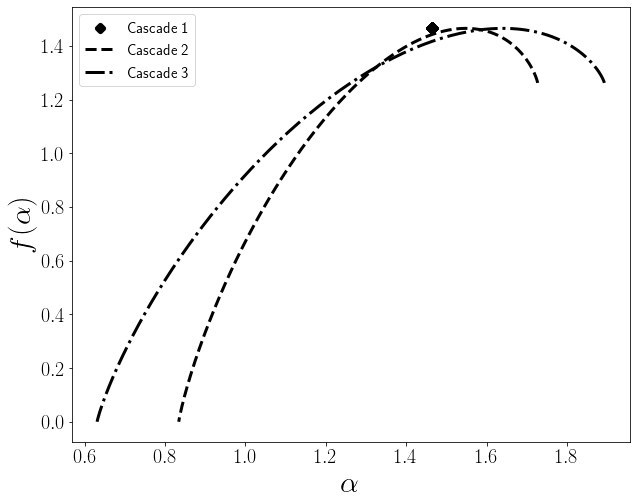

In [49]:
ax=Dimension.plot.scatter('alpha_1', 'falpha_1', color='black', label='Cascade 1',  marker='D', linewidth=5, figsize=(10,8))
Dimension.plot.line('alpha_2', 'falpha_2', color='black', label='Cascade 2', linewidth=3, ax=ax,  linestyle='--')
Dimension.plot.line('alpha_3', 'falpha_3', color='black', label='Cascade 3', ax=ax, linewidth=3, linestyle='-.')

ax.set_ylabel(r'$ f(\alpha) $', fontsize=30)
ax.set_xlabel(r'$ \alpha $', fontsize=30)
ax.legend(fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=18)
handles, labels = ax.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, fontsize=15)
plt.savefig('spectre.png')
plt.savefig('spectre.eps', format='eps')

In [97]:
Dimension.q.apply(lambda x : alpha(gen2[gen2>0],x))

0     1.641644
1     1.616763
2     1.593014
3     1.570546
4     1.549523
5     1.530127
6     1.512555
7     1.497020
8     1.483749
9     1.472983
10    1.464974
11    1.459977
12    1.458254
13    1.460062
14    1.465647
15    1.475243
16    1.489057
17    1.507268
18    1.530018
19    1.557408
20    1.589493
Name: q, dtype: float64

In [48]:
Dimension

,q,Dcas_1,Dcas_2,Dcas_3,alpha_1,alpha_2,alpha_3,falpha_1,falpha_2,falpha_3
0,-5.0,1.464974,1.488819,1.787671,1.464974,1.641644,4.416730,1.464974,1.387645,1.263622
1,-4.5,1.464974,1.487074,1.778156,1.464974,1.616763,4.101488,1.464974,1.397719,1.265075
2,-4.0,1.464974,1.485206,1.766781,1.464974,1.593014,3.786467,1.464974,1.407935,1.267672
3,-3.5,1.464974,1.483208,1.752977,1.464974,1.570546,3.471890,1.464974,1.418125,1.272245
4,-3.0,1.464974,1.481071,1.735944,1.464974,1.549523,3.158197,1.464974,1.428078,1.280138
5,-2.5,1.464974,1.478789,1.714548,1.464974,1.530127,2.846268,1.464974,1.437536,1.293398
6,-2.0,1.464974,1.476354,1.687184,1.464974,1.512555,2.537832,1.464974,1.446194,1.314798
7,-1.5,1.464974,1.473760,1.651621,1.464974,1.497020,2.236264,1.464974,1.453694,1.347226
8,-1.0,1.464974,1.471002,1.604916,1.464974,1.483749,1.947972,1.464974,1.459631,1.391269
9,-0.5,1.464974,1.468074,1.543643,1.464974,1.472983,1.684535,1.464974,1.463553,1.439174
